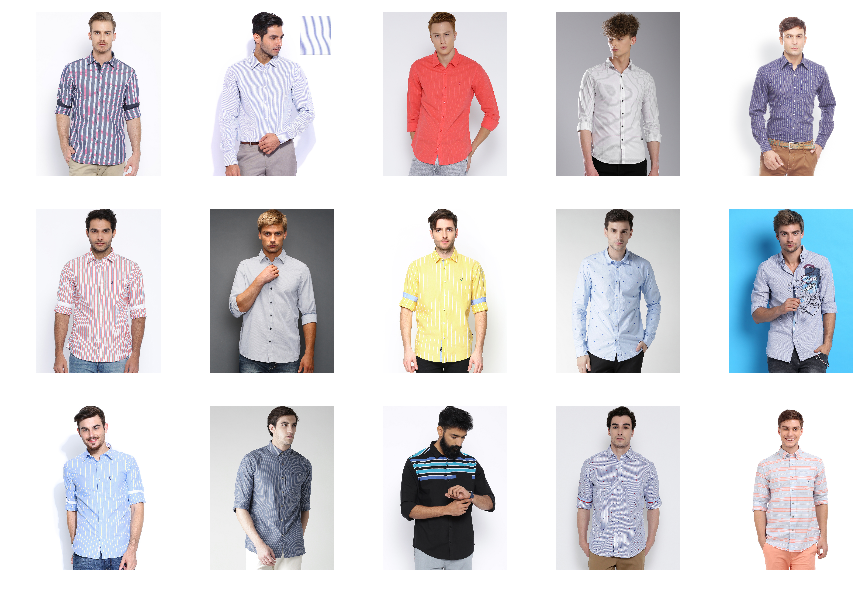

In [11]:
%matplotlib inline
import requests
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

styleids=[1390896,1107972,1850047,1833185,471362,1391087,1214647,666615,1894148,911258,711163,1742945,1374548,1650696,138465]

num_rows = 3
num_cols = 5

fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2)

ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]
gs.update(hspace=0.2)
#gs.tight_layout(fig, h_pad=0,w_pad=0)

i=0
for styleid in styleids: 
    # download image and read
    r = requests.get(url='http://developer.myntra.com/style/' + str(styleid)).json()
    imageURL = r['data']['styleImages']['default']['imageURL']#.replace('assets.myntassets.com/', 'assets.myntassets.com/w_60/')
    urllib.urlretrieve(imageURL, 'data/' + str(styleid) + '.jpg')
    image = mpimg.imread('data/' + str(styleid) + '.jpg')
    
    # predict what type is it

    # visualize prediction
    ax[i].imshow(image)
    ax[i].axis('off')
    i=i+1
fig.savefig('img_grid.png')
plt.show()

In [21]:
import math
styleids=[1390896,1107972,1850047,1833185,471362,1391087,1214647,666615,1894148,911258,711163]
          #1742945,1374548,1650696,138465]
num_rows = int(math.ceil(len(styleids)/float(5)))
num_rows

3

In [7]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import requests
import urllib
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls


app = dash.Dash()

app.layout = html.Div([
    dcc.Input(id='style-input', value='initial value', type="text"),
    dcc.Graph(id='img-grid')
])

/usr/lib64/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [14]:
dir(html.Img)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_if_has_indexable_children',
 '_get_set_or_delete',
 '_js_dist',
 'clear',
 'get',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'to_plotly_json',
 'traverse',
 'update',
 'values']

In [8]:
@app.callback(
    dash.dependencies.Output('img-grid', 'figure'),
    [dash.dependencies.Input('style-input', 'value')])
def display_images(input_string):
        styleids=input_string.split(",")
        styleids=[int(x) for x in styleids]
        num_rows = 3
        num_cols = 5

        fig = plt.figure(figsize=(15,10))
        gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2)

        ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]
        gs.update(hspace=0.2)
        #gs.tight_layout(fig, h_pad=0,w_pad=0)

        i=0
        for styleid in styleids:
                # download image and read
                r = requests.get(url='http://developer.myntra.com/style/' + str(styleid)).json()
                imageURL = r['data']['styleImages']['default']['imageURL']#.replace('assets.myntassets.com/', 'assets.myntassets.com/w_60/')
                urllib.urlretrieve(imageURL, 'data/' + str(styleid) + '.jpg')
                image = mpimg.imread('data/' + str(styleid) + '.jpg')

                # predict what type is it

                # visualize prediction
                ax[i].imshow(image)
                ax[i].axis('off')
                i=i+1
        return tls.mpl_to_plotly(fig)